<a href="https://colab.research.google.com/github/rezamohamadlo/SarcasmDetectionUsingLSTM/blob/main/Sarcasm_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import json  # For working with JSON data
import numpy as np  # For numerical operations and array handling
from tensorflow.keras.preprocessing.text import Tokenizer  # For text tokenization and vectorization
from tensorflow.keras.preprocessing.sequence import pad_sequences  # For padding sequences to ensure uniform input size
import tensorflow as tf  # For creating and training neural network models
import matplotlib.pyplot as plt  # For plotting and visualizing data

In [2]:
# Download the dataset from the provided URL using wget
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json


--2024-09-06 12:07:34--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.1s    

2024-09-06 12:07:35 (46.7 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [3]:
# Load the JSON file and parse it into a Python dictionary
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)  # Reading and loading the JSON data

# Initialize empty lists to hold sentences and their corresponding labels
sentences = []  # Will store the headlines
labels = []  # Will store the sarcasm labels (1 for sarcastic, 0 for not sarcastic)

# Iterate through each item in the datastore
for item in datastore:
    sentences.append(item['headline'])  # Append the headline to the sentences list
    labels.append(item['is_sarcastic'])  # Append the sarcasm label to the labels list


In [4]:
# Define the size of the training dataset
training_size = 22000  # Number of samples to be used for training

# Split the sentences into training and testing sets
training_sentences = sentences[0:training_size]  # First `training_size` sentences for training
testing_sentences = sentences[training_size:]  # Remaining sentences for testing

# Split the labels into training and testing sets
training_labels = labels[0:training_size]  # Labels corresponding to training sentences
testing_labels = labels[training_size:]  # Labels corresponding to testing sentences

# Print the number of sentences in the training and testing sets
print(len(training_sentences))  # Output the number of training sentences
print(len(testing_sentences))  # Output the number of testing sentences


22000
4709


In [5]:
# Define parameters for text preprocessing
vocab_size = 10000  # Maximum number of unique words to consider in the vocabulary
max_length = 120  # Maximum length of sequences (pad or truncate to this length)
trunc_type = 'post'  # Truncate sequences at the end if they exceed `max_length`
padding_type = 'post'  # Pad sequences at the end if they are shorter than `max_length`
oov_tok = "<OOV>"  # Token to use for out-of-vocabulary words

# Initialize the Tokenizer class with specified parameters
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Fit the tokenizer on the training sentences to build the word index
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index  # Retrieve the dictionary mapping words to their integer indices

# Convert training sentences to sequences of integers and pad them
training_sequences = tokenizer.texts_to_sequences(training_sentences)  # Convert text to integer sequences
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)  # Pad or truncate sequences

# Convert testing sentences to sequences of integers and pad them
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)  # Convert text to integer sequences
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)  # Pad or truncate sequences

# Convert labels lists to numpy arrays for model compatibility
training_labels = np.array(training_labels)  # Convert training labels to numpy array
testing_labels = np.array(testing_labels)  # Convert testing labels to numpy array


In [6]:
# Define parameters for the model
embedding_dim = 16  # Dimension of the embedding vector
dense_dim = 6  # Number of units in the dense layer
lstm_dim = 32  # Number of units in the LSTM layer

# Define the model architecture using Conv1D
model_conv = tf.keras.Sequential([
    # Embedding layer to convert integer sequences into dense vectors
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),

    # Bidirectional LSTM layer to capture context from both directions
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),

    # Dropout layer for regularization to prevent overfitting
    tf.keras.layers.Dropout(0.3),

    # Dense layer with ReLU activation for learning non-linear representations
    tf.keras.layers.Dense(dense_dim, activation='relu'),

    # Output layer with sigmoid activation for binary classification
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with binary crossentropy loss and Adam optimizer
model_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary to inspect the model architecture and parameters
model_conv.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Define the number of epochs for training
NUM_EPOCHS = 10  # Number of epochs to train the model

# Train the model using the training data and validate on the testing data
history_conv = model_conv.fit(
    training_padded,  # Training data (padded sequences)
    training_labels,  # Training labels
    epochs=NUM_EPOCHS,  # Number of epochs to train the model
    validation_data=(testing_padded, testing_labels)  # Validation data and labels for evaluation during training
)


Epoch 1/10
688/688 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.6915 - loss: 0.5365 - val_accuracy: 0.8590 - val_loss: 0.3305
Epoch 2/10
688/688 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9099 - loss: 0.2278 - val_accuracy: 0.8535 - val_loss: 0.3407
Epoch 3/10
688/688 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9433 - loss: 0.1551 - val_accuracy: 0.8539 - val_loss: 0.3925
Epoch 4/10
688/688 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9603 - loss: 0.1061 - val_accuracy: 0.8501 - val_loss: 0.4557
Epoch 5/10
688/688 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9758 - loss: 0.0685 - val_accuracy: 0.8473 - val_loss: 0.5362
Epoch 6/10
688/688 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9838 - loss: 0.0503 - val_accuracy: 0.8424 - val_loss: 0.6510
Epoch 7/10
688/688 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9900 - loss: 0.0317 - val_accuracy: 0.8407 - val_loss: 0.7684
Epoch 8/10
688/688 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9933 - loss: 0.0205 - va

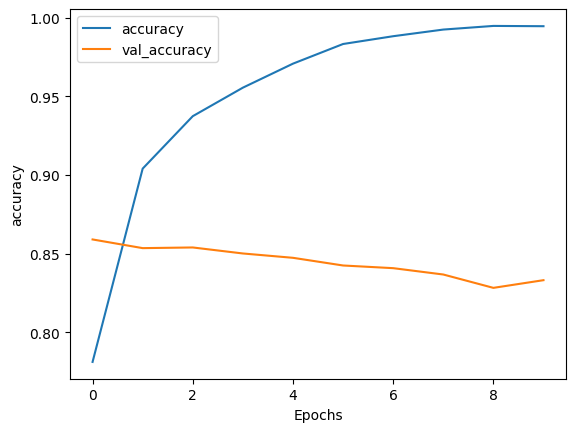

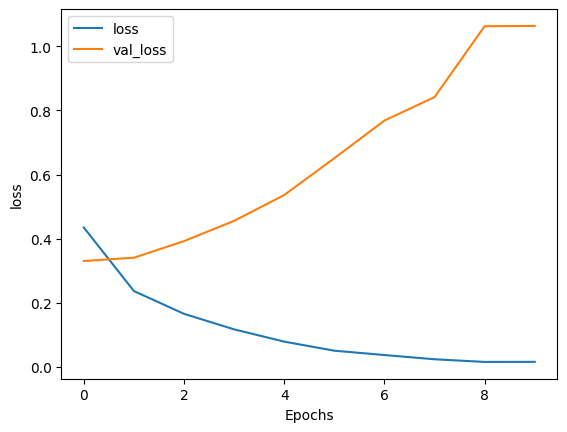

In [8]:
# Utility function to plot training and validation metrics
def plot_graphs(history, string):
    """
    Plots the training and validation metrics over epochs.

    Parameters:
    history (tf.keras.callbacks.History): The history object returned from model training.
    string (str): The metric to plot (e.g., 'accuracy' or 'loss').
    """
    plt.plot(history.history[string])  # Plot the training metric
    plt.plot(history.history['val_'+string])  # Plot the validation metric
    plt.xlabel("Epochs")  # X-axis label
    plt.ylabel(string)  # Y-axis label
    plt.legend([string, 'val_'+string])  # Legend to distinguish between training and validation
    plt.show()  # Display the plot

# Plot the accuracy and loss history using the defined function
plot_graphs(history_conv, 'accuracy')  # Plot training and validation accuracy
plot_graphs(history_conv, 'loss')  # Plot training and validation loss
